# 20/05/17

Looked up papers on using using tied states vs phoneme states. (review here https://docs.google.com/document/d/17VhroitGucKZoqIEYZLYoK8y62Kw2L-h0o2uCZpG9gc/edit?usp=sharing)

Dahl, George E., et al. "Context-dependent pre-trained deep neural networks for large-vocabulary speech recognition." IEEE Transactions on Audio, Speech, and Language Processing 20.1 (2012): 30-42. used tied states

# 27/05/17

In [ ]:
#feature extraction code
from python_speech_features import fbank
import numpy as np
from scipy.io import wavfile
from scipy.signal import hamming
import os
root = '/home/mshah1/wsj/wsj0/'
fileList = root + 'wsj0.wavlist'
with open(fileList,'r') as f:
	files = f.readlines()
	files = map(lambda x: x.strip(), files)

for f in files:
	if not os.path.exists(root + f + '.mls'):
		print f
		(rate,data) = wavfile.read(root + f)
		(feat,_) = fbank(data,samplerate=rate,winlen=0.025,
							winstep=0.015,nfilt=40,nfft=1024,
							lowfreq=250,winfunc=hamming)
		feat = np.log(feat)
		np.savetxt(root + f + '.mls',feat)

In [ ]:
#random label assignment code
def fileToLabels(data, nPhones=30):	
	nFrames = data.shape[0]
	nPhones = nPhones + np.random.randint(-5,high=5)
	segLen = nFrames / nPhones
	labels = []
	for i in range(nPhones):
		currSegLen = segLen + np.random.randint(-10,high=10)
		labels += [np.random.randint(0,high=3000)]*min(currSegLen,nFrames - len(labels))
	return labels

In [ ]:
#MLP for classification
#classification accuracy an abysmal 0.00033
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

data = np.load('wsj0_randlabels.npz')
model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_dim=40))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(3000, activation='softmax'))
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_train = data['X_Train'][:1000000]
y_train = data['Y_Train'][:1000000]
y_train = to_categorical(y_train, num_classes = 3000)
model.fit(x_train,y_train,epochs=10,batch_size=20000)
model.save("mlp_randomAlign.h5")

Changed winstep to 0.01, accuracy went up to 0.00054

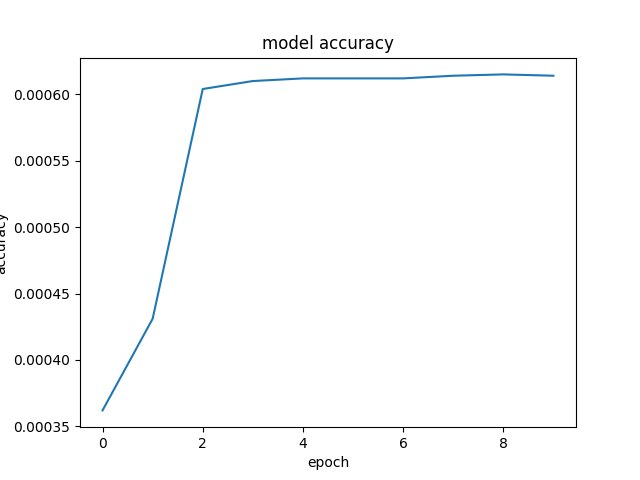

Changed optimizer to rmsprop accuracy went down to 0.00031

accuracy with 250000 testing samples with adagrad = 0.00035

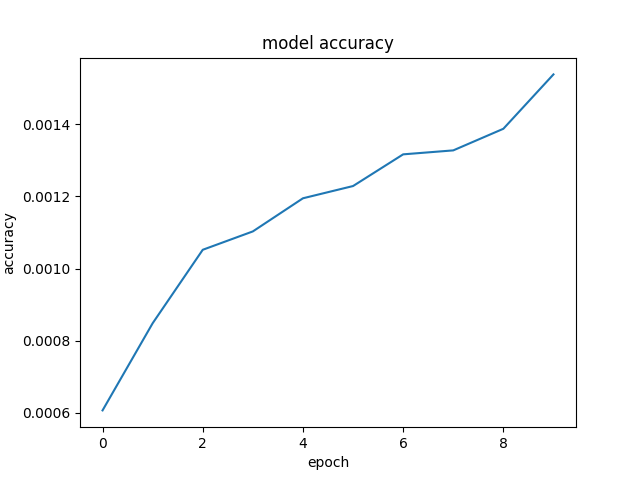

accuracy with relu activations = 0.00031 (training accuracy went up significantly to 0.014)

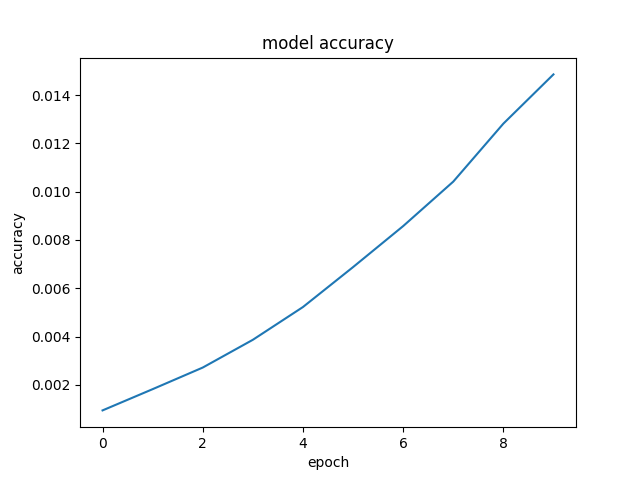

In [ ]:
# Deeper MLP model but accuracy is 0.00032
def mlp3():
	model = Sequential()
	model.add(Dense(500, activation='relu', input_dim=40))
	model.add(Dropout(0.25))
	model.add(Dense(500, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(500, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(500, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(3000, activation='softmax'))
	model.compile(optimizer='adagrad',
	              loss='categorical_crossentropy',
	              metrics=['accuracy'])
	return model

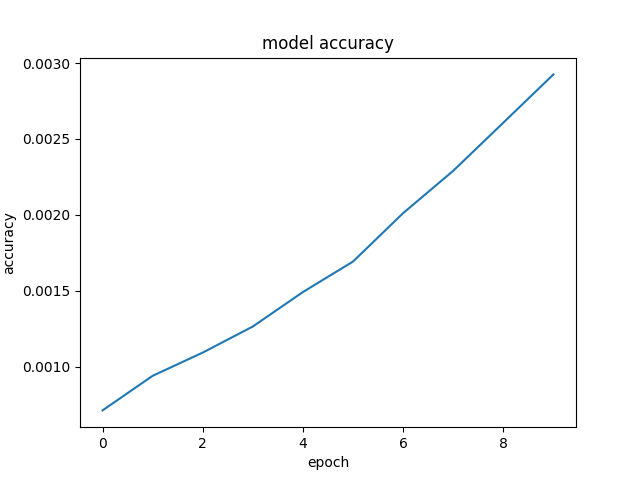

# 28/5/17

Tried using sphinx3_align,, threw the following error
ERROR: "main_align.c", line 974: Uttid mismatch: ctlfile =
  "02aa010i.wv2.flac"; transcript =
  "11_10_1/wsj0/sd_tr_s/00f/00fc031m.wv2"
 
  INFO: feat.c(1205): At directory feat/
 
  INFO: feat.c(1022): Reading mfc file:
  'feat//./11_8_1/wsj0/si_tr_s/02a/02aa010i.wv2.flac.mfc'[0..-1]
 
  INFO: cmn.c(175): CMN: 49.71 -5.35 -6.24  8.33  5.61  7.87 -3.84
  -1.53
  -6.34
  -13.66 -11.63 -8.54 -13.30
 
  INFO: main_align.c(1009): 02aa010i.wv2.flac: 465 input frames
 
 
 
  ERROR: "main_align.c", line 891: Final state not reached; no
  alignment
  for
  02aa010i.wv2.flac


# 30/5/17

Setup sphinx3 on genie

# 1/6/17

Refactored the transcripts and the ctlist so that filenames match
Error persists